In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")


In [3]:
table.info

<bound method DataFrame.info of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482              

In [4]:
table.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
table.columns=[column.lower().replace(' ', '_') for column in table.columns]
table.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [6]:
table = table[['review_text', 'rating', 'division_name', 'department_name']]

In [7]:
table.head()

,review_text,rating,division_name,department_name
0,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,I had such high hopes for this dress and reall...,3,General,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,This shirt is very flattering to all due to th...,5,General,Tops


In [25]:
table = table.dropna(subset = ['review_text'])

In [26]:
comment = TextBlob(table.at[5, 'review_text'])

In [27]:
comment.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [28]:
comment = TextBlob('love')
comment.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [29]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [30]:
#lambda to just show polarity. if we put x[1] we got subjectivity too

table['polarity']=table['review_text'].apply(sentiment).apply(lambda x: x[0])

<ipython-input-30-c18c1b574da6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['polarity']=table['review_text'].apply(sentiment).apply(lambda x: x[0])


In [31]:
table.head()

,review_text,rating,division_name,department_name,polarity
0,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [34]:
table['subjectivity']=table['review_text'].apply(sentiment).apply(lambda x: x[1])

In [35]:
table.head()

,review_text,rating,division_name,department_name,polarity,subjectivity
0,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333,0.933333
1,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583,0.725000
2,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675,0.356294
3,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000,0.625000
4,This shirt is very flattering to all due to th...,5,General,Tops,0.512891,0.568750


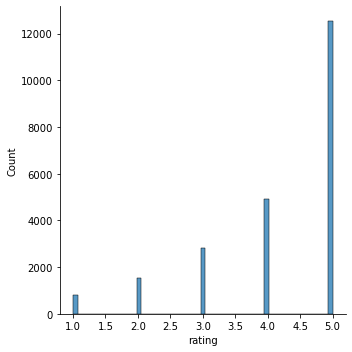

In [36]:
sns.displot(table['rating'])
plt.show()

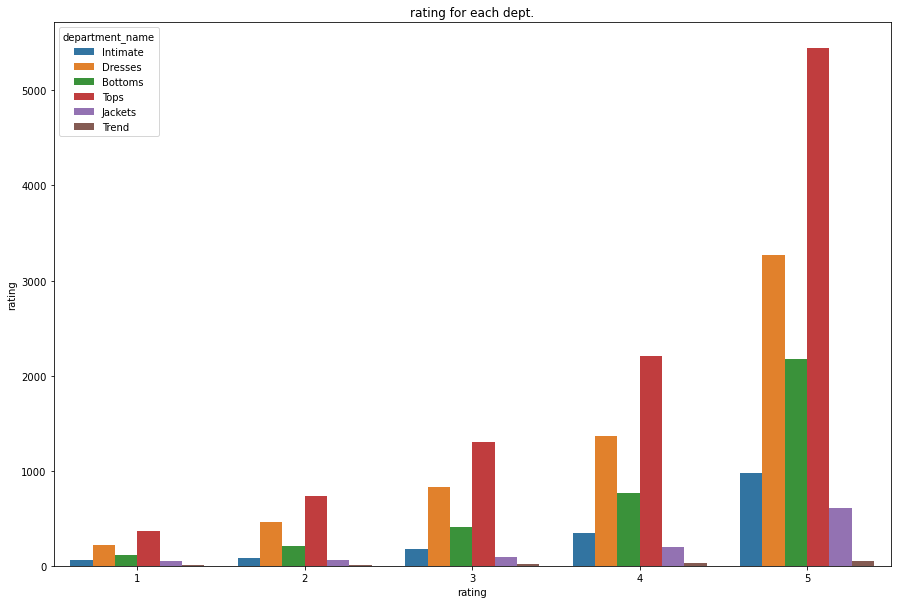

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(x='rating', hue='department_name', data=table)
plt.ylabel('rating')
plt.title('rating for each dept.')
plt.show()

# GroupBy Dept and mean rating 

In [38]:
division_rating = table.groupby(["division_name", "department_name"]).mean()

In [39]:
division_rating 

rating  polarity  subjectivity
division_name  department_name                                  
General        Bottoms          4.260727  0.245849      0.552928
               Dresses          4.150318  0.251091      0.565068
               Jackets          4.225962  0.237141      0.554342
               Tops             4.136778  0.247025      0.554187
               Trend            3.852632  0.203986      0.569373
General Petite Bottoms          4.315226  0.259258      0.557707
               Dresses          4.122328  0.248380      0.568083
               Intimate         4.242291  0.239517      0.583219
               Jackets          4.301587  0.241773      0.556027
               Tops             4.197520  0.256835      0.561556
               Trend            3.782609  0.195925      0.508071
Initmates      Intimate         4.275596  0.256979      0.570742

<AxesSubplot:xlabel='division_name', ylabel='rating'>

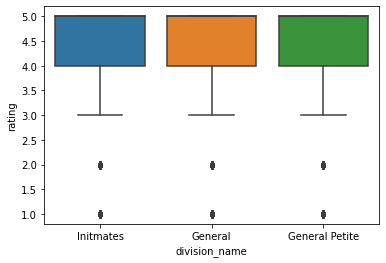

In [40]:
sns.boxplot(x='division_name', y='rating', data=table)

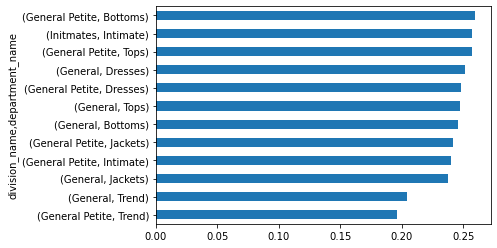

In [42]:
table.groupby(["division_name","department_name"])['polarity'].mean().sort_values().plot.barh();
